In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
transform = transforms.ToTensor()

In [45]:
train_data_set = datasets.MNIST(root='\\Users\\nbanj\\OneDrive\\Desktop\\New folder\\deep learning', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='\\Users\\nbanj\\OneDrive\\Desktop\\New folder\\deep learning', train=False, download=True, transform=transform)

In [46]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: \Users\nbanj\OneDrive\Desktop\New folder\deep learning
    Split: Train
    StandardTransform
Transform: ToTensor()

In [47]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: \Users\nbanj\OneDrive\Desktop\New folder\deep learning
    Split: Test
    StandardTransform
Transform: ToTensor()

In [48]:
batch_sizes = [5, 25, 125, 500, 1000]
train_loader1 = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)

train_loader2 = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)

train_loader3 = DataLoader(train_data_set, batch_size=batch_sizes[2], shuffle=True)
test_loader3 = DataLoader(test_data_set, batch_size=batch_sizes[2], shuffle=True)

train_loader4 = DataLoader(train_data_set, batch_size=batch_sizes[3], shuffle=True)
test_loader4 = DataLoader(test_data_set, batch_size=batch_sizes[3], shuffle=True)

train_loader5 = DataLoader(train_data_set, batch_size=batch_sizes[4], shuffle=True)
test_loader5 = DataLoader(test_data_set, batch_size=batch_sizes[4], shuffle=True)



In [49]:
# Calculating number of parameters in the class
def CalcParams(model):
    val = sum(params.numel() for params in model.parameters() if params.requires_grad)
    return val

In [50]:
#Model1 with 16330 parameters
class Model1(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [51]:
model1=Model1()

In [52]:
model1

Model1(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [53]:
model1params=CalcParams(model1)
print(model1params)

16330


In [54]:
criterion1 = nn.CrossEntropyLoss()

In [55]:
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [56]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model1(X_train.view(5, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1=loss
    train_correct_mod1.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            # Apply the model
            y_val = model1(X_test.view(5, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion1(y_val, y_test)
    test_losses_mod1=(loss)
    test_correct_mod1.append(test_corr)
    
        

In [57]:
train_losses_mod1= train_losses_mod1.detach().numpy()



In [58]:
 for t in train_correct_mod1:
    trn_accu_mod1=t/600
    
print(trn_accu_mod1)

tensor(96.7117)


In [59]:
 for t in test_correct_mod1:
    tst_accu_mod1=t/100
    
print(tst_accu_mod1)

tensor(95.8300)


In [60]:
# Calculate sensitivity of every model
sensitivity_list = []

# Model 1
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model1.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)


In [61]:
#######################################----------Model-2------------#####################################################################

In [62]:
#Model2 with 16330 parameters
class Model2(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [63]:
model2=Model2()

In [64]:
model2

Model2(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [65]:
model2params=CalcParams(model2)
print(model2params)

16330


In [66]:
criterion2 = nn.CrossEntropyLoss()

In [67]:
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [68]:
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader2):
        
        y_pred = model2(X_train.view(25, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod2=loss
    train_correct_mod2.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            # Apply the model
            y_val = model2(X_test.view(25, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion2(y_val, y_test)
    test_losses_mod2=(loss)
    test_correct_mod2.append(test_corr)
    
        

In [69]:
train_losses_mod2= train_losses_mod2.detach().numpy()

In [70]:
 for t in train_correct_mod2:
    trn_accu_mod2=t/600
    
print(trn_accu_mod2)

tensor(96.5800)


In [71]:
 for t in test_correct_mod2:
    tst_accu_mod2=t/100
    
print(tst_accu_mod2)

tensor(95.6300)


In [72]:
# Calculating sensitivity of every model2

# Model 2
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model2.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)



In [73]:
#######################################----------Model-3------------#####################################################################

In [74]:
#Model3 with 16330 parameters
class Model3(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [75]:
model3=Model3()

In [76]:
model3

Model3(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [77]:
model3params=CalcParams(model3)
print(model3params)

16330


In [78]:
criterion3 = nn.CrossEntropyLoss()

In [79]:
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)

In [80]:
epochs = 10
train_correct_mod3 = []
test_correct_mod3 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader3):
       
        y_pred = model3(X_train.view(125, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod3=loss
    train_correct_mod3.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader3):

            # Apply the model
            y_val = model3(X_test.view(125, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion3(y_val, y_test)
    test_losses_mod3=(loss)
    test_correct_mod3.append(test_corr)
    
        

In [81]:
train_losses_mod3= train_losses_mod3.detach().numpy()

In [82]:
for t in train_correct_mod3:
    trn_accu_mod3=t/600
    
print(trn_accu_mod3)

tensor(95.7267)


In [83]:
 for t in test_correct_mod3:
    tst_accu_mod3=t/100
    
print(tst_accu_mod3)

tensor(95.4500)


In [84]:
# Calculating sensitivity of every model3

# Model 3
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model3.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [85]:
#######################################----------Model-4------------#####################################################################

In [86]:
#Model4 with 16330 parameters
class Model4(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [87]:
model4=Model4()

In [88]:
model4

Model4(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [89]:
model4params=CalcParams(model4)
print(model4params)

16330


In [90]:
criterion4 = nn.CrossEntropyLoss()

In [91]:
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.001)

In [92]:
epochs = 10
train_correct_mod4 = []
test_correct_mod4 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader4):
        
        y_pred = model4(X_train.view(500, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer4.zero_grad()
        loss.backward()
        optimizer4.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod4=loss
    train_correct_mod4.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader4):

            # Apply the model
            y_val = model4(X_test.view(500, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion4(y_val, y_test)
    test_losses_mod4=(loss)
    test_correct_mod4.append(test_corr)
    
        

In [93]:
train_losses_mod4= train_losses_mod4.detach().numpy()

In [94]:
for t in train_correct_mod4:
    trn_accu_mod4=t/600
    
print(trn_accu_mod4)

tensor(94.5133)


In [95]:
 for t in test_correct_mod4:
    tst_accu_mod4=t/100
    
print(tst_accu_mod4)

tensor(94.4300)


In [96]:
# Calculating sensitivity of every model4

# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model4.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [97]:
#######################################----------Model-4------------#####################################################################

In [98]:
#Model5 with 16330 parameters
class Model5(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [99]:
model5=Model5()

In [100]:
model5

Model5(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [101]:
model5params=CalcParams(model5)
print(model5params)

16330


In [102]:
criterion5 = nn.CrossEntropyLoss()

In [103]:
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.001)

In [104]:
epochs = 10
train_correct_mod5 = []
test_correct_mod5 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader5):
       
        y_pred = model5(X_train.view(1000, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer5.zero_grad()
        loss.backward()
        optimizer5.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod5=loss
    train_correct_mod5.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader5):

            # Apply the model
            y_val = model5(X_test.view(1000, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion5(y_val, y_test)
    test_losses_mod5=(loss)
    test_correct_mod5.append(test_corr)
    
        

In [105]:
train_losses_mod5= train_losses_mod5.detach().numpy()

In [106]:
for t in train_correct_mod5:
    trn_accu_mod5=t/600
    
print(trn_accu_mod5)

tensor(93.4083)


In [107]:
for t in test_correct_mod5:
    tst_accu_mod5=t/100
    
print(tst_accu_mod5)

tensor(93.4300)


In [108]:
# Calculating sensitivity of every model5

# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model5.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [109]:
train_loss_list=[]
test_loss_list=[]
train_accuracy_list=[]
test_accuracy_list=[]

train_loss_list.append(train_losses_mod1)
train_loss_list.append(train_losses_mod2)
train_loss_list.append(train_losses_mod3)
train_loss_list.append(train_losses_mod4)
train_loss_list.append(train_losses_mod5)

test_loss_list.append(test_losses_mod1)
test_loss_list.append(test_losses_mod2)
test_loss_list.append(test_losses_mod3)
test_loss_list.append(test_losses_mod4)
test_loss_list.append(test_losses_mod5)

train_accuracy_list.append(trn_accu_mod1)
train_accuracy_list.append(trn_accu_mod2)
train_accuracy_list.append(trn_accu_mod3)
train_accuracy_list.append(trn_accu_mod4)
train_accuracy_list.append(trn_accu_mod5)


test_accuracy_list.append(tst_accu_mod1)
test_accuracy_list.append(tst_accu_mod2)
test_accuracy_list.append(tst_accu_mod3)
test_accuracy_list.append(tst_accu_mod4)
test_accuracy_list.append(tst_accu_mod5)

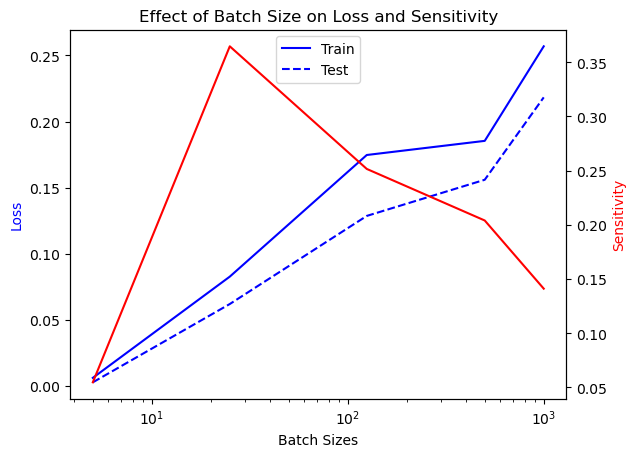

In [110]:
# Visulaize Loss and Sensitivity by batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batch_sizes, train_loss_list, 'b', label='Train')
ax1.plot(batch_sizes, test_loss_list, 'b--', label='Test')
ax2.plot(batch_sizes, sensitivity_list, 'r', label='Sensitivity')
ax1.set_title('Effect of Batch Size on Loss and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Sensitivity', color='r')
ax1.legend(loc='upper center')

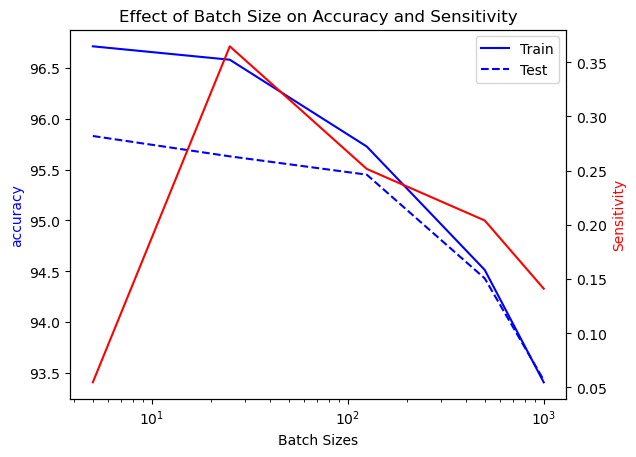

In [111]:
# Visulaize Accuracy and Sensitivity by batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batch_sizes, train_accuracy_list, 'b', label='Train')
ax1.plot(batch_sizes, test_accuracy_list, 'b--', label='Test')
ax2.plot(batch_sizes, sensitivity_list, 'r', label='Sensitivity')
ax1.set_title('Effect of Batch Size on Accuracy and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('accuracy', color='b')
ax2.set_ylabel('Sensitivity', color='r')
ax1.legend(loc='upper right')